## Probability Distributions 
### Professors Warner and Horton

In this notebook, we will introduce some of the more common discrete and continuous probability distributions. These are commonly used to model random events.

### Discrete Distributions

Remember that a random variable is a mapping from the sample space to a real number, $X:S \rightarrow \mathbb{R}$. The *probability mass function* (pmf) is a function that maps each outcome of the random variable to a real number between 0 and 1, $f: \mathbb{R} \rightarrow [0,1]$, such that for all $x \in \mathbb{R}$, 

$$f(x)=P(X=x)$$

Another useful idea is that of the *cumulative distribution function* (cdf) which is:

$$ F_{X}(x) = P(X \leq x)$$


The pmf can be written as an explicit function, a table, a plot, or words. We will focus on the first. Most problems take a wording and convert it to a table of function.

##### Example  

A team is playing a two game series against another team. The probability of winning the first game is 0.52 and the probability of winning the second, your star player has a planned absence, is 0.43. Let $X$ be the number of games won in the two played. 

1) Determine the probability mass function as a table.  
2) Find the cumulative distribution function as a table.  
3) Find the probability of winning at least one game.  

In [86]:
# Run this code to import packages
import datascience as ds
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

The random variable $X$ the number of games won in two played. It can take the values ${0,1,2}$. The sample space is ${LL,LW,WL,WW}$ which we will map to the random variable. Thus $LL \rightarrow 0$, $LW \rightarrow 1$,  $WL \rightarrow 1$, and  $WW \rightarrow 2$. The pmf is:

1) Find the probability mass function.

In [87]:
w1=.52
w2=.43
pmf_table=ds.Table().with_columns(["Number of Wins (x)",np.arange(3)])
probs= np.array([(1-w1)*(1-w2),(1-w1)*w2+w1*(1-w2),w1*w2]) # MEATY PART
pmf_table=pmf_table.with_columns(["Probability P(X=x)",probs])
pmf_table

Number of Wins (x),Probability P(X=x)
0,0.2736
1,0.5028
2,0.2236


2) Find the cumulative probability distribution.

In [88]:
def cdf(table):
    '''Given a two column table with values in first column and probability mass in the second,
    return a table of the cdf
    table - Two columns with realizations of the random variable in first and probability in second'''
    temp=table.select(0).with_columns("Cumulative Probability",np.cumsum(table[1]))
    return temp

In [89]:
cdf(pmf_table)

Number of Wins (x),Cumulative Probability
0,0.2736
1,0.7764
2,1


3) Find the probability of winning at least one game.

In [90]:
# My code

# Win game 1 OR win game 2: use union rule
w1 + w2 - w1*w2
# Another way: win only g1 OR only g2 OR both
w1*(1-w2) + (1-w1)*w2 + w1*w2

0.7263999999999999

0.7264

*The probability of winning at least one game is 0.7264*

#### Moments

Random variables can be summarized with expected values. In general, let $X$ be a discrete random variable with pmf $f(x)$. Then $$E(g(X)) = \sum_{x}g(x)f(x)$$

The mean is $$E(X) = \mu = \sum_{x}xf(x),$$ also called the first moment about the origin, and variance is 
$$E((X- \mu)^{2})  = V(X) = \sigma ^{2} =\sum_{x}(x - \mu)^{2}f(x), $$ known as the second moment about the mean.

For our problem above, find the mean and variance.

In [91]:
pmf_table

Number of Wins (x),Probability P(X=x)
0,0.2736
1,0.5028
2,0.2236


In [92]:
# My code
# Finding expected value of game wins
E = np.sum(pmf_table.column(0) * pmf_table.column(1))
# Sum all       value      * probability of value
E

0.95

In [93]:
# My code
# Finding variance of game wins
V = ((pmf_table.column(1) - E)**2 * pmf_table.column(0)).sum()
#    deviation of each value  ^2  *  probability of value, summed
V

1.2553017599999998

*The expected value of the double header is 0.95, with a variance of 1.255*

### Named Discrete Distributions

Helpfully, random variables often take on familiar "named" distributions. Such distributions occur often enough that we know the generic form of the pmf, expected value and variance. In these cases, we can avoid deriving the pmf like we did in 1) above. Below, we introduce many common "named" discrete distributions.

#### Binomial  

If each trial of an experiment has only two outcomes, arbitrarily named success and failure, where the probability of success of each trial is constant and independent of the prior trials and the number of trials is fixed in advance, then we have a binomial random variable.  
The general form of the random variable is $X$ is the number of successes in $n$ trials.

In [94]:
# P is the probability of success in each trial

The closed form solution to the pmf is $$f(x;n,p) = {n\choose x}p^{x}(1-p)^{n-x}$$

Write a function to find the pmf of a binomial and then use it to make a second cdf function. The following function will help.

In [95]:
from math import factorial

def choose(n, c):
    '''Number of ways to choose c items from a list of n items.'''
    return factorial(n) // (factorial(n - c) * factorial(c))

In [96]:
def my_binom(x,n,p):
    '''pmf of binomial r.v.; returns the probability of x successes out of n trials 
    where each trial has probability p of success'''
    return choose(n,x) * p**x * (1-p)**(n-x)

In [97]:
my_binom(1,2,.25)

0.375

In [98]:
def binom_table(n,p):
    '''Create the pmf table for a binomial'''
    pmf_table=ds.Table().with_columns("Number of Successes (x)",np.arange(n+1))
    pmf_table=pmf_table.with_columns("Probability P(X=x)",pmf_table.apply(lambda x:my_binom(x,n,p),0))
    return pmf_table

In [99]:
binom_table(4,.25)

Number of Successes (x),Probability P(X=x)
0,0.316406
1,0.421875
2,0.210938
3,0.046875
4,0.00390625


In [100]:
cdf(binom_table(4,.25))

Number of Successes (x),Cumulative Probability
0,0.316406
1,0.738281
2,0.949219
3,0.996094
4,1


##### Checking results

The scipy package has common "named" distributions built into its stats module. See the [link](https://docs.scipy.org/doc/scipy/reference/stats.html) to the package.

In [101]:
stats.binom.pmf(2,4,.25)

0.21093750000000006

In [102]:
stats.binom.cdf(2,4,.25)

0.94921875

The mean and variance of a binomial are $$E(X) = np$$ and $$V(X) = np(1-p)$$

##### Randomization

The scipy package also allows you to obtain random realizations from a random variable with a named distribution. 

In [103]:
rands=stats.binom.rvs(4,0.25,size=1000)
rands[:10]

array([2, 1, 2, 1, 1, 0, 3, 1, 2, 1])

Let's look at the mean and variance of our random sample and compare with the mean and variance above.

In [104]:
#Mean of random sample
print(rands.mean())
#Population mean
print(4*0.25)
#Var of random sample
print(rands.var())
#Population variance
print(4*0.25*0.75)

1.011
1.0
0.7288790000000002
0.75


##### Example 

Suppose you toss a fair die 12 times. Let $X$ be the number of rolls that resulted in 1 and 2.

1) Find the pmf of $X$.

2) Find the mean and variance of $X$.

3) Find the probability that $X$ is in the interval $[3,7]$. 

*Given $n=12$ trials and $p=\frac{2}{6}$ since 1&2 are 2 of 6 equally-weighted options, the pmf of $X$ is:
$$
f\left(x;12,\frac{1}{3}\right) = {12\choose x}\left(\frac{1}{3}\right)^{x}\left(1-\frac{1}{3}\right)^{12-x}
$$
The mean is:
$$
E(X) = 12\left(\frac{1}{3}\right) = 4
$$
The variance is:*
$$
V(X) = 12\left(\frac{1}{3}\right)\left(1-\frac{1}{3}\right) = 4\left(\frac{2}{3}\right) = \frac{8}{3}
$$


In [105]:
sum(stats.binom.pmf(np.arange(3,8), 12, 1/3))

0.8001189219499428

*There is an 80% chance that $X$ is in the interval $[3,7]$.*

#### Negative Binomial  

Similar to binomial except that the failures, the trials, are random and the successes are fixed. Notice that the last trial has to be a success.  
The general form of the random variable is $X$ number of failures until the r<sup>th</sup> success.  
The geometric distribution is a special case where r is 1.
Since the trials are not fixed, $x = 0, 1, 2, 3, ...$

The closed form solution to the pmf is $$f(x;r,p) = {x+r-1\choose x}p^{r}(1-p)^{x}$$

The mean and variance of a negative binomial are $$E(X) = \frac{r}{p}-r$$ and $$V(X) = \frac{r(1-p)}{p^2}$$

##### Example

Suppose I am a 60% free throw shooter (the probability of making a free throw is 0.6, and all my free throws are independent with identical chance of success). I would like to make 5 free throws. Let $X$ be the number of misses before I make 5 free throws. 

1) Find the mean and variance of $X$.

2) Find the probability I only need 5 attempts to make 5 free throws.

3) Find the probability I need at least 10 attempts to make 5 free throws. 

*Given $r=5$ successes and $p=0.6$ chance of making each throw, the pmf of $X$ is:
$$
f(x;5,0.6) = {x+5-1\choose x}0.6^{5}(1-0.6)^{x} = {x+4\choose x}0.07776(0.4)^{x}
$$
The mean is:
$$
E(X) = \frac{5}{0.6}-5 = \frac{10}{3}
$$
The variance is:*
$$
V(X) = \frac{5(1-0.6)}{0.6^{2}} = \frac{50}{9}
$$


In [106]:
stats.nbinom.pmf(0, 5, 0.6)
    # 5 attempts - 5 successes = 0 failures
sum(stats.nbinom.pmf(np.arange(5, 10**3), 5, 0.6))
    # Not sure how to do this exactly, so I'm approximating by summing the probability of requiring 10 attempts (5 failures),
    # 11 attempts, 12 attempts, ... , 999 attempts
    # Since the probability -> 0 as X -> inf, this approximation converges to the true value

0.07776

0.26656768000000003

*There is a 7.8% chance of requiring only 5 attempts to sink 5 free throws, and a 26.7% chance of requiring 10 or more attempts to score 5 times.*

#### Poisson

The Poisson distribution is common for modeling count or arrival data. It is common to model arrivals using the Poisson process. In this process, $X$, the number of arrivals in a specified amount of time, follows the Poisson distribution with parameter $\lambda$, the average number of arrivals in that specified amount of time. For $x = 0,1,2,3,...$, the closed form solution to the pmf is
$$
f(x;\lambda)=\frac{e^{-\lambda}\lambda^x}{x!}
$$

The mean and variance are $$E(X)=V(X)=\lambda$$

##### Example

Suppose fleet vehicles arrive to a maintenance garage at an average rate of 4 per day. Let's model these arrivals using the Poisson process. Let $X$ be the number of vehicles that arrive in a five day period. 

1) What is the distribution (with parameter) of $X$? 

2) Find the probability that fewer than 10 vehicles arrive in a five day period. 

3) Find the probability that at least 18 vehicles arrive in a five day period. 

*1) *$X$~$Pois(\lambda=4\cdot5)$

In [107]:
sum(stats.poisson.pmf(np.arange(10),4*5))
# Sum of probabilities of 0,1,...,9 vehicles arriving for average of 20 in time period
sum(stats.poisson.pmf(np.arange(18,10**3),4*5))
# Similar estimation as with binom: sum of probabilities of 18,19,...,999 arrivals

0.00499541230830758

0.7029716020753232

*2) There is a slight chance, just under 0.5%, of fewer than 10 vehicles arriving in a 5-day period.*

*3) There is a much better chance, almost 70.3%, of at least 18 arrivals in that same time.*

#### Hypergeometric

The hypergeometric distribution is similar to the binomial distribution, but where outcomes are drawn without replacement. $X$ is the number of successes out of $N$ trials, but these trials are selected out of a finite population containing $M$ objects with $n$ successes. We can think of this as an urn problem similar to those we discussed in the Lesson 8 notebook. For $N-(M-n) \leq x \leq \min(n,N)$, 
$$
f(x;N,n,M)= \frac{{n\choose k}{{M-n}\choose {N-k}}}{M\choose N}
$$

The mean and variance are 
$$
E(X)=\frac{nN}{M}
$$

and
$$
V(X)=\frac{nN(M-n)(M-N)}{M^2(M-1)}
$$

##### Example

Suppose we have an urn containing 6 blue, 9 red and 8 white balls. We select 6 at random. Let $X$ be the number of red balls we select in our sample of 6. 

1) Find the expected value of $X$.

2) Find $P(X\geq 2)$. 

3) Find the variance of $X$. Verify your calculation by generating a large random sample and computing the variance of that random sample. 

In [108]:
N=6 # trials
M=6+9+8 # total balls
n=9 # total red balls
print('1) Mean: ' + str(stats.hypergeom.mean(M,n,N)))
print('   E(X): ' + str(n*N/M)) # check

print('2) P(X>=2): ' + str(sum(stats.hypergeom.pmf(np.arange(2,min(n,N)+1),M,n,N)) ))
# sum of probabilities for X=2 to Xmax

# Algebraic:
print('3) V(X): ' + str(n*N*(M-n)*(M-N)/(M*M*(M-1)) ))

# Random sample
trials = 10**4

# Generate list of balls
balls = np.array(['1'])
for i in np.arange(6):
    balls=np.append(balls,'blue')
for i in np.arange(9):
    balls=np.append(balls,'red')    
for i in np.arange(8):
    balls=np.append(balls,'white')
balls=np.delete(balls,0) # remove initiator element
# Run trials
X=np.empty(trials) # records sumer of successes per trial
for t in np.arange(trials):
    bag = balls # records remaining balls
    pulled = np.array(['x'])
    for pull in np.arange(N):
        i=np.random.choice(np.arange(len(bag))) # pick a random index for tempBalls
        pulled=np.append(pulled, bag[i]) # copy selected ball into pulled
        bag=np.delete(bag,i) # remove ball from bag
    X[t]=sum(pulled=='red') # count total reds & record
        
print('   Vexp(X): ' + str(np.var(X))) # Calculate variance of X

1) Mean: 2.347826086956522
   E(X): 2.347826086956522
2) P(X>=2): 0.7917620137299798
3) V(X): 1.1043134559202612
   Vexp(X): 1.106324


*1) $E(X)=2.348$*

*2) $P(X\geq2)=0.792$*

*3) $V(X)=1.104$, which is confirmed by experimental variances between 1.09 and 1.12.*

#### Uniform

A random variable with the discrete uniform distribution, with parameters $a$ and $b$, has an equal probability of taking on any integers in the range $[a,b)$. For $a\leq x < b$,
$$
f(x;a,b)= \frac{1}{b-a}
$$

The mean and variance are 
$$
E(X) = \frac{b+a-1}{2}
$$

and 
$$
V(X) = \frac{(b-a-1)(b-a+1)}{12}
$$


#### Multinomial

The multinomial distribution is a generalization of binomial distribution. In the binomial case, trials can result in either success or failure. In the multinomial case, there could be more than two distinct outcomes. Here, the random variable $X$ is a vector (rather than a scalar) representing the counts of each outcome. For more information regarding the multinomial distribution, please review the `scipy` documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html). 

### Continuous Distributions

Now we turn to random variables that can take on any value in a range rather than only distinct points. These continous distributions differ in several ways from their discrete counterparts. 

Rather than a pmf, each continuous random variable has a **probability density function** (pdf). This too is represented by $f_X(x)$, but the function does not return a probability but rather a density. The pdf has the properties that 
1. $f(x) \geq 0$  

2. $\int_{-\infty}^{\infty} f(y) dy = 1$

Also, each random variable as a **cumulative distribution function** (cdf). This function has the same meaning as in the discrete case, but can be found via integration:  
$$ F_{X}(x) = P(X \leq x) = \int_{-\infty}^x f(y)dy $$

Suppose $Y$ is a continuous random variable that can take any value in the interval $[0,1]$. It has the pdf $f_Y(y) = 2y$ in this interval. Because $Y$ is a continuous random variable the probablility at any specific value is technically 0. We could find the probability that $Y$ takes a value in any range by integrating across this function. For example: 
$$
P(0\leq Y \leq 0.5) = \int_0^{0.5} 2y dy = y^2\bigg|_0^{0.5} = 0.25
$$

In [109]:
from scipy import integrate

Create a function for the pdf

In [110]:
def my_pdf(x):
    if x<0 or x>1:
        return 0
    return 2*x

In [111]:
np.round(integrate.quad(lambda x:my_pdf(x),0,.5)[0],5)

0.25

In [112]:
np.round(integrate.quad(lambda x:my_pdf(x),-3,2)[0],5)

1.0

### Moments

As in the discrete case, continuous random variables can be summarized using moments. However, we can use integration rather than direct sums. Let $X$ be a continuous random variable with pdf $f(x)$:
$$
E(g(x))=\int_x g(x)f(x)dx
$$

The mean, or expected value, of $X$ is found by:
$$
E(X)=\int_x xf(x)dx
$$

The variance of $X$ is:
$$
V(X)=E((X-\mu)^2)=\int_x (x-\mu)^2f(x) dx
$$

Also, the expression for variance can be simplified to $V(X)= E(X^2) - \mu^2$. 


We can use Python to integrate numerically. To find the expected value of $X$:

In [113]:
np.round(integrate.quad(lambda x:x*my_pdf(x),-3,2)[0],5)

0.66667

##### Example

1) Let $g(x)=kx^2$ on $[0,2]$. Find $k$ that makes $g(x)$ a proper pdf. 

2) Find $P(.5<X<1.5)$

3) Find $E(X)$

In number 1, I integrated
$$
\int_0^2 kx^2 dx = k\left[\frac{x^3}{3}\right]_0^2 = k\left(\frac{8}{3}-0\right) = 1
$$
*Therefore, $k=\frac{3}{8}$.*

*For number 2,*
$$
\begin{align}
P(0.5<X<1.5)&=\int_{0.5}^{1.5} g(x)dx\\
&=\int_{0.5}^{1.5} \frac{3}{8}x^2dx\\
&=\frac{3}{8}\frac{1}{3}(x^3) \bigg |_{0.5}^{1.5}\\
&=\frac{1}{8}(\frac{27}{8}-\frac{1}{8})\\
&=\frac{13}{32}\\
\end{align}
$$

*For number 3,*
$$
\begin{align}
E(X)&=\int_X xg(x)dx\\
&=\int_0^2 x(\frac{3}{8}x^2)dx\\
&=\frac{3}{8} \int_0^2 x^3dx\\
&=\frac{3}{8}(\frac{1}{4})(x^4)\bigg|_0^2\\
&=\frac{3}{32}(16-0)\\
&=1.5\\
\end{align}
$$

#### Uniform

The simplest continuous distribution is the uniform distribution. Let $X$ be a random variable that has the continuous uniform distribution on $[a,b]$. $X$ has equal probability of taking any value in this range. For $a \leq x \leq b$, 
$$
f(x)=\frac{1}{b-a}
$$

The mean and variance are
$$
E(X)=\frac{a+b}{2}
$$

and 
$$
V(X)=\frac{(b-a)^2}{12}
$$

#### Exponential

The exponential distribution is closely related to the Poisson distribution. Both distributions are results of a Poisson process. Recall that in a Poisson process, if $X$ represents the number of arrivals in a certain amount of time, then $X$ follows a Poisson distribution with parameter $\lambda$, the mean number of arrivals in that amount of time. 

Let $Y$ represent the amount of time until the next arrival in this process. $Y$ follows an exponential distribution with parameter $\lambda$, the mean number of arrivals in *unit* time. Note that in `scipy`, the parameter is specified with the `scale` argument, where `scale` is equal to $1/\lambda$. 

For $y\geq 0$,
$$
f(y)=\lambda e^{-\lambda y}
$$

The mean and variance are 
$$
E(Y)=\frac{1}{\lambda}
$$
and 
$$
V(Y)=\frac{1}{\lambda^2}
$$


##### Example

Suppose fleet vehicles arrive to a maintenance garage at an average rate of 4 per day. Let's model these arrivals using the Poisson process. Let $Y$ be the time (in days) until the next arrival. 

1) What is the distribution (with parameter) of $Y$? 

2) Find the probability that no vehicles arrive in the next five days. 

3) Find the probability that the next vehicle will arrive at least 2 days from now, but before 4 days from now. 

*1) *$Y$~$exp(\lambda=4)$

*2)*
$$
\begin{align}
P(Y>5)&=\int_5^\infty f(y)dy\\
&=\int_5^\infty \lambda e^{-\lambda y}dy\\
&=\lambda(\frac{-1}{\lambda})e^{-\lambda y}|_5^\infty\\
&=-1(0-e^{-5\lambda})\\
&=e^{-5\lambda}\\
&=e^{-20}=2.06\times10^{-9}
\end{align}
$$

In [114]:
print('P(2<=Y<4) = ' + str(stats.expon.cdf(4,scale=1/4) - stats.expon.cdf(2,scale=1/4)))
# Calculate by finding cdf for P(Y<4) and subtracting P(Y<2), since y is below 4 but above 2

P(2<=Y<4) = 0.00033535009272778193


#### Normal

The normal (or Gaussian) distribution is an incredibly important distribution in probability and statistics. You have certainly seen a bell curve at some point and are likely aware that certain quantities take a bell shaped, or normal, distribution. 

Let $X \sim \textsf{N}(\mu,\sigma)$. The parameters $\mu$ and $\sigma$ represent the mean and standard deviation of $X$. In `scipy`, these are referred to as `loc` and `scale`. 

For $-\infty < x < \infty$,
$$
f(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

As mentioned, the mean and variance are $\mu$ and $\sigma^2$. 

##### Example

Let $X$ follow the normal distribution with mean 3 and standard deviation 10. 

1) Find $P(X<0)$. 

2) Find the 90th percentile of $X$. 

3) Given $X$ is greater than the mean, find the probability that $X$ is less than the mean plus two standard deviations. 

In [115]:
print('1) P(X<0) = ' + str(np.round(integrate.quad(lambda x:stats.norm.pdf(x, loc=3, scale=10),-10**3,0)[0],5)))
# find P by numerically integrating normal pdf function from -1000 (big enough to approximate -inf) to 0
print('   P(X<0) = ' + str(stats.norm.cdf(0,loc=3, scale=10))) # check with the built-in function I didn't even notice...

# Because F(x) can't be solved for x, have to find 90th percentile by guess & check
m=3
sd=10
t=0 # count timer
targ = 0.9 # target F(x)

xMin = -10**3 # lower & upper bounds & median of guess range
xMax = 10**3
x = (xMin+xMax)/2

# initial pdf:
Fx = stats.norm.cdf(x, loc=m, scale=sd)

while not(Fx==targ) and t<10**2:
    # Determine if target is higher or lower than x
    if Fx<targ:
        # x is lower than target
        xMin = x
    else:
        # x is higher than target
        xMax = x
    x = (xMin+xMax)/2 # recalculate x & Fx
    Fx = stats.norm.cdf(x, loc=m, scale=sd)
    t+=1 # count iterations to avoid infinite loop
print('2) The 90th percentile of X is ' + str(np.round(x,5)))

1) P(X<0) = 0.38209
   P(X<0) = 0.3820885778110474
2) The 90th percentile of X is 15.81552


*3)*
$$
\begin{align}
P(x<\mu+2\sigma|x>\mu)&=\frac{P(\mu<x<\mu+2\sigma)}{P(x>\mu)}\\
&=\frac{P(x<\mu+2\sigma)-P(x\leq\mu)}{1-P(x\leq\mu)}\\
\text{where}~P(x<a)&=\int_{-\infty}^a f(x)dx
\end{align}
$$

In [116]:
print('P(x<u+2s | x>u) = ' + str(
    ( stats.norm.cdf(m+2*sd, loc=m, scale=sd) - stats.norm.cdf(m, loc=m, scale=sd) )/ # P(x<u+2s) - P(x<u)
    (1 - stats.norm.cdf(m, loc=m, scale=sd) ))) # P(x<u)

P(x<u+2s | x>u) = 0.9544997361036416


#### Gamma

The gamma distribution is a generalization of the exponential distribution. If $X$ has the gamma distribution with parameters $\alpha$ and $\lambda$. Note that in `scipy`, $\alpha$ is the shape parameter, $a$, and $\lambda$ is the inverse of the scale parameter (similar to the exponential distribution). 

For $x\geq 0$, 
$$
f(x;\alpha,\lambda)= \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x}
$$

The mean and variance are:
$$
E(X)=\frac{\alpha}{\lambda}
$$

and
$$
V(X)=\frac{\alpha}{\lambda^2}
$$

##### Example

Let $X \sim \textsf{Gamma}(3,0.7)$. 

1) Find $P(X>E(X))$

2) Find $P(X\leq 1)$

In [117]:
# P(X>E(X)) = 1 - P(X<=E(X)), and E(X) = a/lambda
a=3 # shape param
l=0.7 # scale param
print('1) P(X>E(X)) = ' + str( 1-stats.gamma.cdf(a/l, a, scale=1/l) ))
print('2) P(X<=1) = ' + str( stats.gamma.cdf(1, a, scale=1/l) ))

1) P(X>E(X)) = 0.4231900811268434
2) P(X<=1) = 0.0341415841257085


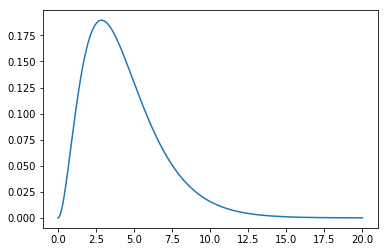

In [118]:
_,ax=plt.subplots(1,1)
x=np.arange(0.001,20,0.001)
ax.plot(x,stats.gamma.pdf(x,3,scale=1/0.7));

Note that we can plot the exponential distribution with $\lambda=0.7$ by setting $a=1$:

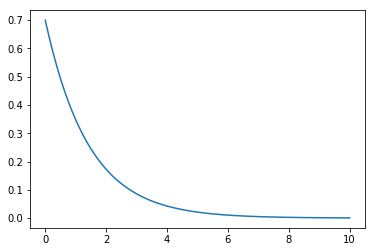

In [119]:
_,ax=plt.subplots(1,1)
x=np.arange(0.001,10,0.001)
ax.plot(x,stats.gamma.pdf(x,1,scale=1/0.7));

#### Beta

The beta distribution is unique among continuous distributions in that it applies only to random variables restricted to the domain $[0,1]$. The continuous uniform distribution is a special case of the beta distribution. To learn more about the beta distribution, see the `scipy` documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta

##### Example

1) What are the parameters of the beta distribution that make the distribution equivalent to $\textsf{Unif}(0,1)$? 

$$
\begin{align}
\textsf{Unif}(0,1)&=\textsf{Beta}(a,b)\\
\frac{1}{1-0}&=\frac{\gamma(a+b)x^{a-1}(1-x)^{b-1}}{\gamma(a)\gamma(b)}\\
&\text{Guess: }a=1,~b=1\\
1&=\frac{\gamma(2)x^{1-1}(1-x)^{1-1}}{\gamma(1)\gamma(1)}\\
&=\frac{(1)!x^0(1-x)^0}{(0)!(0)!}\\
&=\frac{(1)(1)(1)}{(1)(1)}\\
1&=1
\end{align}
$$